# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
btc_assets = 1.2
eth_assets = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC data and format
btc_url = btc_url + "?format=json"
btc_data = requests.get(btc_url).json()

# Print BTC data in json format
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18641500,
            "total_supply": 18641500,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 46508.0,
                    "volume_24h": 62393618227,
                    "market_cap": 869902916523,
                    "percentage_change_1h": -0.0657825413020536,
                    "percentage_change_24h": 1.86520799428512,
                    "percentage_change_7d": -19.3537608475358,
                    "percent_change_1h": -0.0657825413020536,
                    "percent_change_24h": 1.86520799428512,
                    "percent_change_7d": -19.3537608475358
                }
            },
            "last_updated": 1614568480
        }
    },
    "metadata": {
        "timestamp": 1614568480,
        "num_c

In [6]:
# Fetch current BTC price
btc_price = btc_data['data']['1']['quotes']['USD']['price']
print("BTC Price: $" + str(btc_price))

BTC Price: $46508.0


In [7]:
# Fetch current ETH data and format
eth_url = eth_url + "?format=json"
eth_data = requests.get(eth_url).json()

# Print ETH data in json format
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 114864965,
            "total_supply": 114864965,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1441.18,
                    "volume_24h": 36155780164,
                    "market_cap": 165977020064,
                    "percentage_change_1h": -0.578080134543263,
                    "percentage_change_24h": 1.01865728490658,
                    "percentage_change_7d": -25.7669484654652,
                    "percent_change_1h": -0.578080134543263,
                    "percent_change_24h": 1.01865728490658,
                    "percent_change_7d": -25.7669484654652
                }
            },
            "last_updated": 1614568323
        }
    },
    "metadata": {
        "timestamp": 1614568323,
        "num_

In [8]:
# Fetch current ETH price
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
print("ETH Price: $" + str(eth_price))


ETH Price: $1441.18


In [9]:
# Compute current value of my crpto
my_btc = btc_assets * btc_price
my_eth = eth_assets * eth_price
# Print current crypto wallet balance
print(f"The current value of your {btc_assets} BTC is ${my_btc:0.2f}")
print(f"The current value of your {eth_assets} ETH is ${my_eth:0.2f}")

The current value of your 1.2 BTC is $55809.60
The current value of your 5.3 ETH is $7638.25


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Current amount of shares
spy_shares = 50
agg_shares = 200

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [12]:
# Format current date as ISO format
date = pd.Timestamp("2021-02-26", tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=date
).df

# Preview DataFrame
df_ticker.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-02-26 00:00:00-05:00  114.96  115.39  114.5915  115.37  9735524  384.35   

                                                              
                             high     low   close     volume  
time                                                          
2021-02-26 00:00:00-05:00  385.58  378.23  380.32  134902084

In [13]:
# Pick AGG and SPY close prices
agg_close_price = int(df_ticker["AGG"]["close"].values)
spy_close_price = int(df_ticker["SPY"]["close"].values)

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115
Current SPY closing price: $380


In [14]:
# Compute the current value of shares
my_spy = spy_shares * spy_close_price
my_agg = agg_shares * agg_close_price

# Print current value of share
print(f"The current value of your {spy_shares} SPY shares is ${my_spy:0.2f}")
print(f"The current value of your {agg_shares} AGG shares is ${my_agg:0.2f}")

The current value of your 50 SPY shares is $19000.00
The current value of your 200 AGG shares is $23000.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
my_index = ['Crypto', 'Shares']
crypto = my_btc + my_eth
shares = my_spy + my_agg
df_savings = pd.DataFrame(data = [crypto, shares], index = my_index, columns = ['Amounts'])

# Display savings DataFrame
display(df_savings)

,Amounts
Crypto,63447.854
Shares,42000.000


[<AxesSubplot:ylabel='Amounts'>]


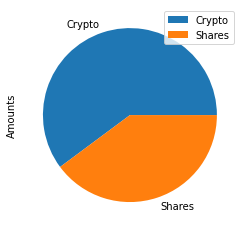

In [16]:
# Plot savings pie chart
print(df_savings.plot.pie(subplots = True))

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount = crypto + shares
needed_funds = emergency_fund - total_amount
# Validate saving health
if total_amount >= emergency_fund:
    print("Congratulations you have reached your financial goal")
else: 
    print(f"Dollars away from reaching financial goal: $ {needed_funds}")
    
    

Congratulations you have reached your financial goal


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [27]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-02-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-02-28', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high      low    close   volume   
time                                                                     
2019-10-07 00:00:00-04:00  113.64  113.7050  113.510  113.520  1828049   
2019-10-08 00:00:00-04:00  113.82  113.8200  113.485  113.550  2765236   
2019-10-09 00:00:00-04:00  113.55  113.5600  113.359  113.485  2689301   
2019-10-10 00:00:00-04:00  113.27  113.3300  113.030  113.090  3504667   
2019-10-11 00:00:00-04:00  112.84  112.8501  112.585  112.730  3437394   

                              SPY                                      
                             open    high       low   close    volume  
time                                                                   
2019-10-07 00:00:00-04:00  293.47  295.26  292.7700  293.11  51170613  
2019-10-08 00:00:00-04:00  291.04  291.85  288.4900  288.55  82885280  
2019-10-09 00:00:00-04:00  290.75  292.30  290.0600  291.23  49246505  
2019-10-10 00:00:00-04:00  291.18  294.21  291.0000  293.24  50981567  
2019-10-11 00:00:00-04:00  296.27  298.74  296.1448  296.26  83204669

In [29]:
# Printing the simulation input data
MC_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 100,
    num_trading_days = 252*5
)
MC_five_years_df = MC_five_years.portfolio_data
MC_five_years_df.head()

AGG                                       \
                             open      high      low    close   volume   
time                                                                     
2019-10-07 00:00:00-04:00  113.64  113.7050  113.510  113.520  1828049   
2019-10-08 00:00:00-04:00  113.82  113.8200  113.485  113.550  2765236   
2019-10-09 00:00:00-04:00  113.55  113.5600  113.359  113.485  2689301   
2019-10-10 00:00:00-04:00  113.27  113.3300  113.030  113.090  3504667   
2019-10-11 00:00:00-04:00  112.84  112.8501  112.585  112.730  3437394   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2019-10-07 00:00:00-04:00          NaN  293.47  295.26  292.7700  293.11   
2019-10-08 00:00:00-04:00     0.000264  291.04  291.85  288.4900  288.55   
2019-10-09 00:00:00-04:00    -0.000572  290.75  292.30  290.0600  291.23   
2019-10-10 00:00:00-04:00    -0.003481  291.18  294.21  291.0000  293.24   
2019-10-11 00:00:00-04:00    -0.003183  296.27  298.74  296.1448  296.26   

                                                  
                             volume daily_return  
time                                              
2019-10-07 00:00:00-04:00  51170613          NaN  
2019-10-08 00:00:00-04:00  82885280    -0.015557  
2019-10-09 00:00:00-04:00  49246505     0.009288  
2019-10-10 00:00:00-04:00  50981567     0.006902  
2019-10-11 00:00:00-04:00  83204669     0.010299

In [30]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
start_date = pd.Timestamp('2015-02-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2045-02-28', tz='America/New_York').isoformat()

df_stock_data_30 = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

MC_30_years = MCSimulation(
    portfolio_data = df_stock_data_30,
    weights = [.40,.60],
    num_simulation = 100,
    num_trading_days = 252*30
)
cum_returns = MC_30_years.calc_cumulative_return()
cum_returns

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999426,1.012406,0.999210,0.999640,0.989800,0.996966,1.009390,1.006375,0.998614,1.005550,...,1.005262,0.994976,1.014297,1.002030,1.007016,0.996997,0.999775,0.999892,0.999253,1.008727
2,0.993895,1.022569,1.004234,0.998151,1.000880,1.003212,1.008343,1.007218,1.002551,0.997426,...,1.000246,0.998394,1.016022,0.985974,1.009854,1.007636,1.004119,0.999734,1.008429,1.001563
3,0.997387,1.026191,0.998989,0.993462,1.002848,1.007169,1.021146,1.002032,1.004462,1.005547,...,1.004914,0.997629,1.017209,0.994832,1.016021,1.002460,1.005548,1.004964,1.020565,0.997513
4,0.998100,1.031596,0.993122,0.987968,0.997994,1.018873,1.027333,1.003134,1.006919,1.009944,...,1.012233,0.997880,1.016264,1.001843,1.014883,1.005918,1.008136,1.009488,1.017096,0.994338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,146.621090,68.777041,181.206155,63.373856,308.667679,196.452845,231.839639,83.116603,107.151361,56.400100,...,197.234227,331.121158,138.096655,102.772813,117.397405,98.392512,260.583777,142.878703,83.741385,324.293780
7557,145.644742,69.598774,181.925112,63.131048,310.711160,196.141409,230.410244,83.773132,106.439619,56.214740,...,197.798181,332.542466,138.625080,101.310073,116.868259,98.606688,258.191418,142.251644,84.040040,321.707387
7558,144.655941,69.891416,182.383881,63.004582,311.661227,195.877294,230.366014,84.025758,106.682298,56.344960,...,197.118233,334.008338,138.516011,102.053754,118.559323,97.362758,259.846980,143.270228,84.587355,321.186443
7559,144.432099,68.785965,182.311365,62.969161,310.133631,196.206331,227.852984,84.096209,105.332512,56.298222,...,198.216875,330.469460,137.534734,102.560440,118.685258,96.615611,261.360530,144.095877,84.546585,324.303090


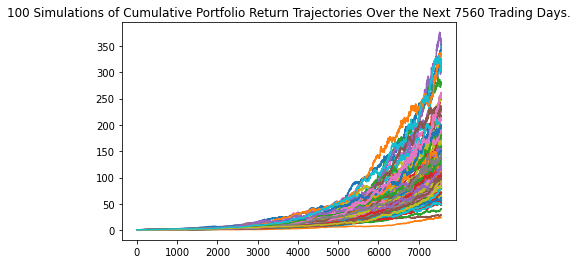

In [31]:
# Plot simulation outcomes
line_plot = MC_30_years.plot_simulation()

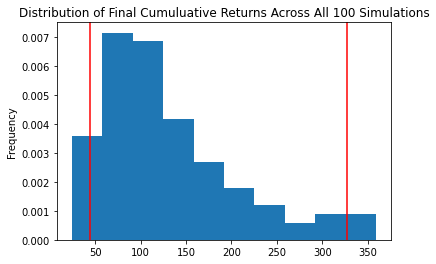

In [32]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_years.plot_distribution()

### Retirement Analysis

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30_years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           100.000000
mean            132.824173
std              75.599068
min              24.230457
25%              81.165200
50%             112.703503
75%             171.230642
max             359.462224
95% CI Lower     44.285103
95% CI Upper    327.850785
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [34]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $885702.06 and $6557015.7


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [35]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1328553.1 and $9835523.55


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")